<a href="https://colab.research.google.com/github/IndiaTJohnson/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**

### **- India Johnson**

## Load and Inspect Data

In [ ]:
import pandas as pd

In [ ]:
#Load in sales data from Google Drive
fpath = "/content/drive/MyDrive/Coding Dojo/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
#Create Dataframe
df_sales = pd.read_csv(fpath)

In [ ]:
#Preview the Data
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Check the first 5 rows of the dataframe
df_sales.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

## Clean Data

## **Initial Data Inspection**

In [ ]:
#Count the number of rows and columns
len(df_sales)

8523

In [ ]:
len(df_sales.columns)

12

In [ ]:
df_sales.shape

(8523, 12)

In [ ]:
#Examine the datatypes of each variable
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#Discover any duplicates
df_sales.duplicated().sum()

0

In [ ]:
#Count the number of unique values in each column
df_sales.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
#Percentage of unique values in each column
df_sales.nunique() / len(df_sales) * 100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

### **Should the Product IDs be unique? I am not sure as the percent that is unique is VERY low and the data dictionary does not specify.**


## **Duplicates and Missing Values**

In [ ]:
#Number of values in the Product IDs column that are duplicated
duplicated_ID = df_sales.duplicated(subset=["Item_Identifier"], keep = False)
duplicated_ID.sum()

8514

In [ ]:
#Address duplicates

In [ ]:
#Assess duplicated rows
duplicated_rows = df_sales.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
#Sum of duplicated rows
duplicated_rows.sum()

0

In [ ]:
#Find any missing values

In [ ]:
#Number of missing values from each column
null_value = df_sales.isna().sum()
null_value

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Percent of missing values from each column
null_percent = null_value/len(df_sales) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<Axes: >

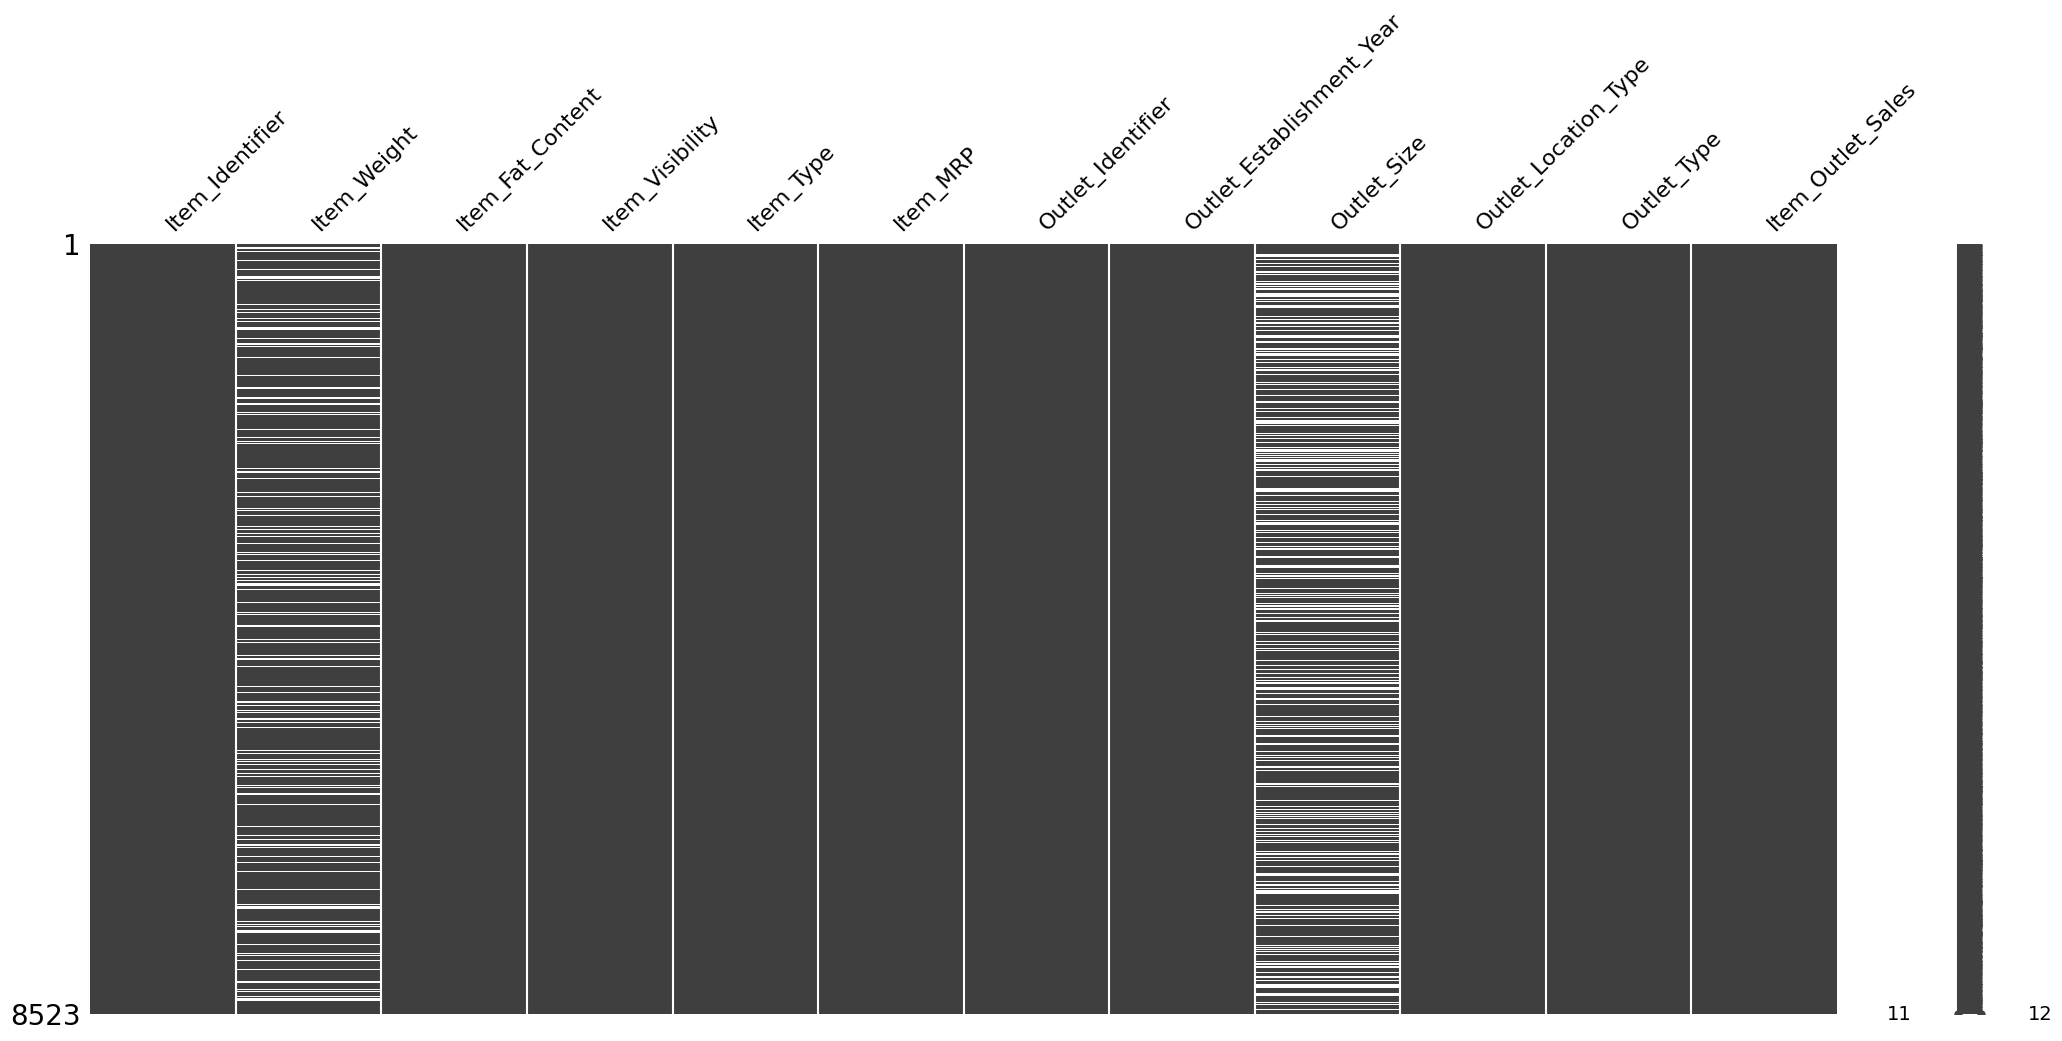

In [ ]:
#Visualize missing values
import missingno as msno
msno.matrix(df_sales)

In [ ]:
#Create variable for missing vlaues in Item Weight column
null_weight = df_sales["Item_Weight"].isna()

In [ ]:
#Columns with NaN values for Item_Weight
df_sales[null_weight]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low Fat         0.127470   
18             DRI11          NaN          Low Fat         0.034238   
21             FDW12          NaN          Regular         0.035400   
23             FDC37          NaN          Low Fat         0.057557   
29             FDC14          NaN          Regular         0.072222   
...              ...          ...              ...              ...   
8485           DRK37          NaN          Low Fat         0.043792   
8487           DRG13          NaN          Low Fat         0.037006   
8488           NCN14          NaN          Low Fat         0.091473   
8490           FDU44          NaN          Regular         0.102296   
8504           NCN18          NaN          Low Fat         0.124111   

                  Item_Type  Item_MRP Outlet_Identifier  \
7               Snack Foods  107.7622            OUT027   
18              Hard Drinks  113.2834            OUT027   
21             Baking Goods  144.5444            OUT027   
23             Baking Goods  107.6938            OUT019   
29                   Canned   43.6454            OUT019   
...                     ...       ...               ...   
8485            Soft Drinks  189.0530            OUT027   
8487            Soft Drinks  164.7526            OUT027   
8488                 Others  184.6608            OUT027   
8490  Fruits and Vegetables  162.3552            OUT019   
8504              Household  111.7544            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
7                          1985      Medium               Tier 3   
18                         1985      Medium               Tier 3   
21                         1985      Medium               Tier 3   
23                         1985       Small               Tier 1   
29                         1985       Small               Tier 1   
...                         ...         ...                  ...   
8485                       1985      Medium               Tier 3   
8487                       1985      Medium               Tier 3   
8488                       1985      Medium               Tier 3   
8490                       1985       Small               Tier 1   
8504                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
7     Supermarket Type3          4022.7636  
18    Supermarket Type3          2303.6680  
21    Supermarket Type3          4064.0432  
23        Grocery Store           214.3876  
29        Grocery Store           125.8362  
...                 ...                ...  
8485  Supermarket Type3          6261.8490  
8487  Supermarket Type3          4111.3150  
8488  Supermarket Type3          2756.4120  
8490      Grocery Store           487.3656  
8504  Supermarket Type3          4138.6128  

[1463 rows x 12 columns]

In [ ]:
#Create variables for filters for Item Weight and Outlet_Established_Year to establish connection
weight_filter = df_sales["Item_Weight"].isna()
year_filter = df_sales["Outlet_Establishment_Year"] == 1985

#Sum concurrent instances of missing item weight and year established being 1985
filters_combined = weight_filter & year_filter
filters_combined.sum()

1463

There appears to be a correlation between the weight of an item being missing and the outlet establishment year being 1985.

1985 may be the earliest the dataset can go or there could be another reason. I'll disregard this correlation for now.

In [ ]:
#Show rows with null values for Outlet_Size and create variable
null_outletsize = df_sales["Outlet_Size"].isna()
df_sales[null_outletsize]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3              FDX07       19.200          Regular         0.000000   
8              FDH17       16.200          Regular         0.016687   
9              FDU28       19.200          Regular         0.094450   
25             NCD06       13.000          Low Fat         0.099887   
28             FDE51        5.925          Regular         0.161467   
...              ...          ...              ...              ...   
8502           NCH43        8.420          Low Fat         0.070712   
8508           FDW31       11.350          Regular         0.043246   
8509           FDG45        8.100          Low Fat         0.214306   
8514           FDA01       15.000          Regular         0.054489   
8519           FDS36        8.380          Regular         0.046982   

                  Item_Type  Item_MRP Outlet_Identifier  \
3     Fruits and Vegetables  182.0950            OUT010   
8              Frozen Foods   96.9726            OUT045   
9              Frozen Foods  187.8214            OUT017   
25                Household   45.9060            OUT017   
28                    Dairy   45.5086            OUT010   
...                     ...       ...               ...   
8502              Household  216.4192            OUT045   
8508  Fruits and Vegetables  199.4742            OUT045   
8509  Fruits and Vegetables  213.9902            OUT010   
8514                 Canned   57.5904            OUT045   
8519           Baking Goods  108.1570            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                          1998         NaN               Tier 3   
8                          2002         NaN               Tier 2   
9                          2007         NaN               Tier 2   
25                         2007         NaN               Tier 2   
28                         1998         NaN               Tier 3   
...                         ...         ...                  ...   
8502                       2002         NaN               Tier 2   
8508                       2002         NaN               Tier 2   
8509                       1998         NaN               Tier 3   
8514                       2002         NaN               Tier 2   
8519                       2002         NaN               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
3         Grocery Store           732.3800  
8     Supermarket Type1          1076.5986  
9     Supermarket Type1          4710.5350  
25    Supermarket Type1           838.9080  
28        Grocery Store           178.4344  
...                 ...                ...  
8502  Supermarket Type1          3020.0688  
8508  Supermarket Type1          2587.9646  
8509      Grocery Store           424.7804  
8514  Supermarket Type1           468.7232  
8519  Supermarket Type1           549.2850  

[2410 rows x 12 columns]

Item_Weight - float/numerical

Outlet_Size - string/categorical

In [ ]:
#Add placeholder values for missing values

In [ ]:
#Summarize Item_Weight column statistically
df_sales["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
#Fill missing item weights with -1
df_sales["Item_Weight"] = df_sales["Item_Weight"].fillna(-1)

In [ ]:
#Fill missing Outlet_Size values with MISSING
df_sales["Outlet_Size"] = df_sales["Outlet_Size"].fillna("MISSING")

In [ ]:
#Confirm all missing values have been dealt with
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## **Make categories consistant**

In [ ]:
#Find inconsistant categories of data
#Create index variable that contains all string columns in dataframe
string_cols = df_sales.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
#Create loop that shows value counts for each string column in dataframe
for col in string_cols:
  print (f"Value Counts for {col}")
  print(df_sales[col].value_counts())
  print ('\n') #For readability

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [ ]:
df_sales["Item_Fat_Content"] = df_sales['Item_Fat_Content'].replace({'LF':"Low Fat", 'reg':"Regular", 'low fat':"Low Fat"})

In [ ]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

I wasn't sure if rounding was necessary or not.

In [ ]:
#Round Item_MRP to nearest cent
df_sales['Item_MRP'] = df_sales['Item_MRP'].round(2)
df_sales['Item_MRP']

0       249.81
1        48.27
2       141.62
3       182.10
4        53.86
         ...  
8518    214.52
8519    108.16
8520     85.12
8521    103.13
8522     75.47
Name: Item_MRP, Length: 8523, dtype: float64

## **Summarize Cleaned Data**

In [ ]:
#Isolate numerical columns
num_cols = df_sales.select_dtypes("number").columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
import numpy as np
from statistics import mode

In [ ]:
#Summary Statistics of numerical columns
df_sales.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     10.478936         0.066132   140.992810                1997.831867   
std       6.720742         0.051598    62.275166                   8.371760   
min      -1.000000         0.000000    31.290000                1985.000000   
25%       6.650000         0.026989    93.825000                1987.000000   
50%      11.000000         0.053931   143.010000                1999.000000   
75%      16.000000         0.094585   185.645000                2004.000000   
max      21.350000         0.328391   266.890000                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

## **Exploratory Data Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Show column data types for determining plot types.

In [ ]:
#Show numeric only columns
df_sales.select_dtypes("number").columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
#Show only categroical columns
df_sales.select_dtypes("object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

## **Histograms**

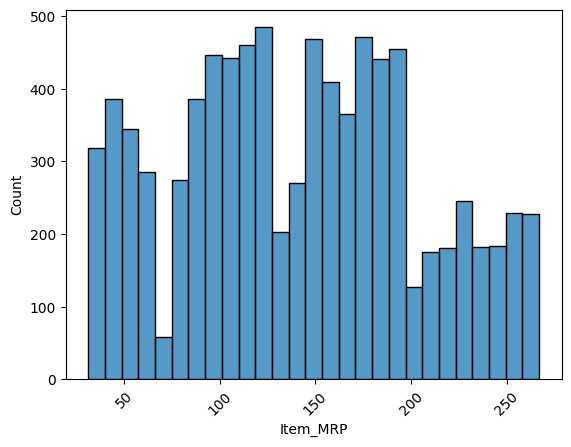

In [ ]:
#Create a Histogram of Item_MRP
ax = sns.histplot(data=df_sales, x='Item_MRP')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);

## **Boxplots**

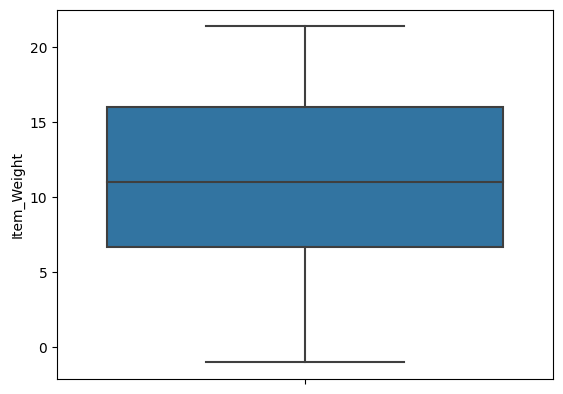

In [ ]:
#Creating a Box plot of Item_Weights
ax = sns.boxplot(data=df_sales, y="Item_Weight")

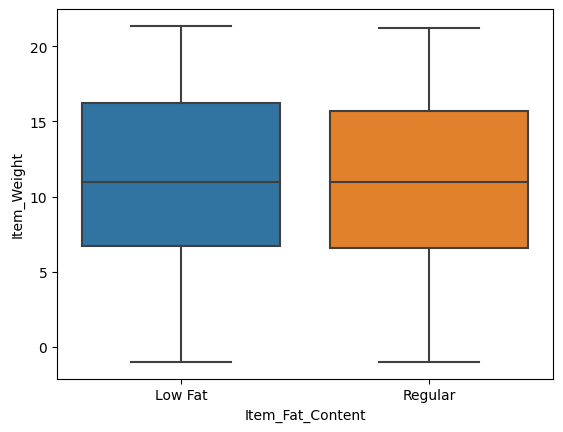

In [ ]:
#Creating a Box Plot of Item_Weight relationship to Item_Fat_Content
ax = sns.boxplot(data=df_sales, x="Item_Fat_Content", y="Item_Weight")

## **Countplots**

In [ ]:
# Saving the value_counts of Outlet_Establishment_Year to use with seaborn
val_counts = df_sales['Outlet_Establishment_Year'].value_counts()
val_counts.head(10)

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

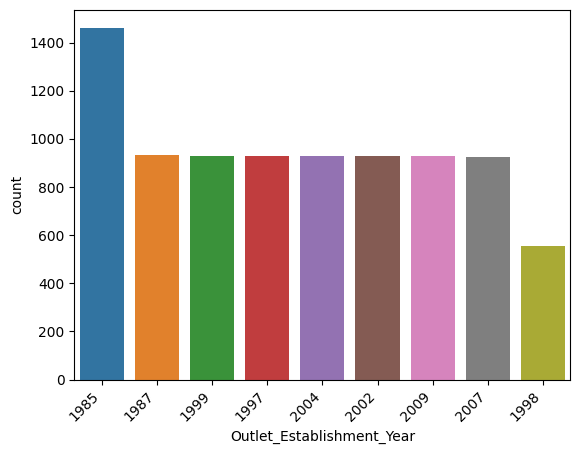

In [ ]:
# Creating a Countplot with seaborn (ordered by count)
ax = sns.countplot(data=df_sales, x="Outlet_Establishment_Year",
                   order=val_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

## **Bar Plots**

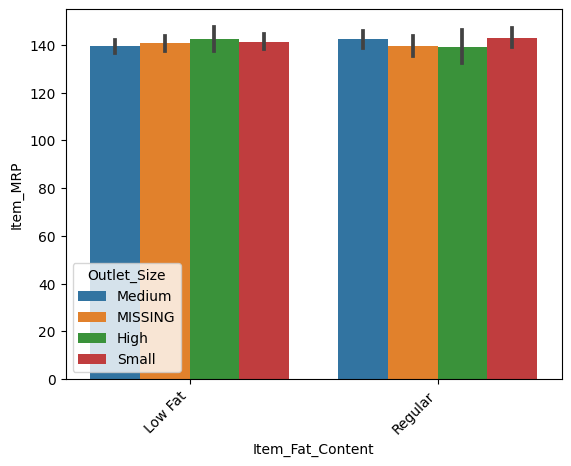

In [ ]:
#Create a Grouped Bar Plot of Item_Fat_Content to Item_MRP
ax = sns.barplot(data=df_sales, x="Item_Fat_Content", y="Item_MRP", hue="Outlet_Size")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

## **Scatterplots**

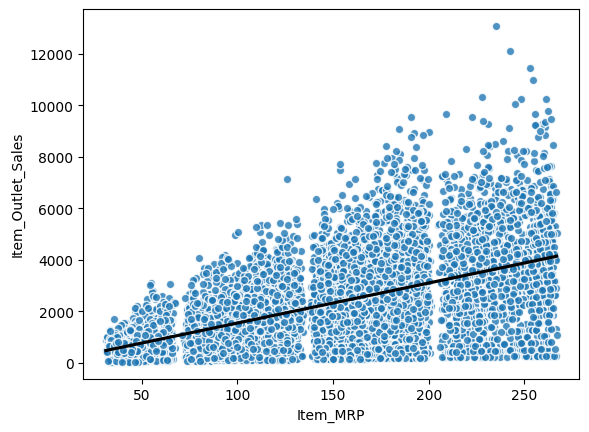

In [ ]:
#Create scatter/regplot of Item_MRP v Item_Outlet_Sales with regression line
scatter_kws = dict(edgecolor='white')
line_kws=dict(color="Black")

ax = sns.regplot(data=df_sales, x="Item_MRP", y="Item_Outlet_Sales",
                 line_kws=line_kws, scatter_kws=scatter_kws);

## **Heatmap**

In [ ]:
#Create correlation variable
corr = df_sales.corr(numeric_only=True)
corr.round(2)

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                       1.00            -0.08      0.02   
Item_Visibility                  -0.08             1.00     -0.00   
Item_MRP                          0.02            -0.00      1.00   
Outlet_Establishment_Year         0.54            -0.07      0.01   
Item_Outlet_Sales                -0.06            -0.13      0.57   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                     0.54              -0.06  
Item_Visibility                                -0.07              -0.13  
Item_MRP                                        0.01               0.57  
Outlet_Establishment_Year                       1.00              -0.05  
Item_Outlet_Sales                              -0.05               1.00

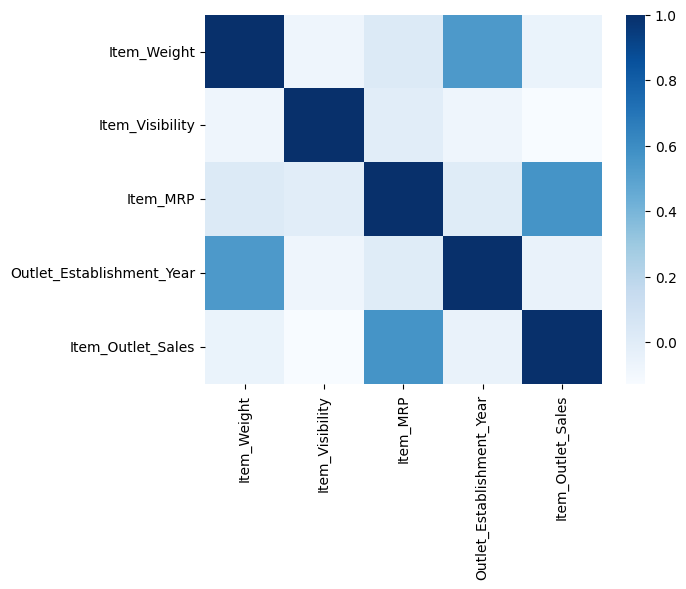

In [ ]:
#Create Heatmap to show correlation between features
ax = sns.heatmap(corr, cmap = "Blues")

### **Imports**

In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

### **Configuration Settings**

In [ ]:
## Display all columns
pd.set_option('display.max_column', None)

## Display all rows
pd.set_option('display.max_rows', None)

#SK Learn Display
set_config(display='diagram')

### **Load Data**

In [ ]:
#Load in uncleaned data
fpath = "/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)

### **Perform EDA**

In [ ]:
#Check the first 5 rows
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [ ]:
#Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Check data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#Check for duplicate rows
df.duplicated().sum()

0

In [ ]:
#Check for null values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**We will deal with the missing values in the next step with SimpleImputer.**

In [ ]:
#Check for inconsistant categories

#Create variable for string columns
string_cols = df.select_dtypes("object").columns

# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')


Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
FDV38     9
NCF42     9
FDT07     9
FDW26     9
NCL31     9
FDU12     9
FDG09     9
FDQ40     9
FDX20     9
NCI54     9
FDX31     9
FDP25     9
FDW49     9
FDF56     9
FDO19     9
DRN47     9
NCB18     9
FDE11     8
NCX05     8
FDQ39     8
FDT55     8
FDO32     8
FDT40     8
FDZ20     8
FDH27     8
FDY49     8
FDS33     8
FDR04     8
FDR43     8
FDR59     8
FDJ55     8
FDT24     8
FDY55     8
FDV09     8
FDU23     8
FDY47     8
DRD25     8
FDK58     8
FDL58     8
FDX58     8
FDR44     8
FDP28     8
FDA39     8
FDH28     8
DRF27     8
FDX21     8
FDY56     8
FDF05     8
FDL20     8
FDY03     8
NCK05     8
FDS55     8
DRA59     8
FDG24     8
NCE54     8
FDZ21     8
FDA04     8
FDW24     8
FDT49     8
DRF23     8
FDD05     8
FDH10     8
FDX50     8
FDT32     8
FDK20     8
FDU13     8
FDN56     8
FDZ26     8
FDL34     8
DRF01     8
FDG38  

In [ ]:
#Change High to Large in Outlet_Size
df["Outlet_Size"] = df["Outlet_Size"].replace({'High':'Large'})
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

In [ ]:
#Make Low fat and Regular categories consistant
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Check numerical values for inconsistent values
df.describe().round(2)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
count      7060.00          8523.00   8523.00                    8523.00   
mean         12.86             0.07    140.99                    1997.83   
std           4.64             0.05     62.28                       8.37   
min           4.56             0.00     31.29                    1985.00   
25%           8.77             0.03     93.83                    1987.00   
50%          12.60             0.05    143.01                    1999.00   
75%          16.85             0.09    185.64                    2004.00   
max          21.35             0.33    266.89                    2009.00   

       Item_Outlet_Sales  
count            8523.00  
mean             2181.29  
std              1706.50  
min                33.29  
25%               834.25  
50%              1794.33  
75%              3101.30  
max             13086.96

### **Seperate the Data**

In [ ]:
#Seperate the target value and features
target = 'Item_Outlet_Sales'
X = df.drop(columns=[target, 'Item_Identifier'])
y = df[target]

In [ ]:
X

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
5          10.395          Regular         0.000000           Baking Goods   
6          13.650          Regular         0.012741            Snack Foods   
7             NaN          Low Fat         0.127470            Snack Foods   
8          16.200          Regular         0.016687           Frozen Foods   
9          19.200          Regular         0.094450           Frozen Foods   
10         11.800          Low Fat         0.000000  Fruits and Vegetables   
11         18.500          Regular         0.045464                  Dairy   
12         15.100          Regular         0.100014  Fruits and Vegetables   
13         17.600          Regular         0.047257            Snack Foods   
14         16.350          Low Fat         0.068024  Fruits and Vegetables   
15          9.000          Regular         0.069089              Breakfast   
16         11.800          Low Fat         0.008596     Health and Hygiene   
17          9.000          Regular         0.069196              Breakfast   
18            NaN          Low Fat         0.034238            Hard Drinks   
19         13.350          Low Fat         0.102492                  Dairy   
20         18.850          Regular         0.138190            Snack Foods   
21            NaN          Regular         0.035400           Baking Goods   
22         14.600          Low Fat         0.025698              Household   
23            NaN          Low Fat         0.057557           Baking Goods   
24         13.850          Regular         0.025896           Frozen Foods   
25         13.000          Low Fat         0.099887              Household   
26          7.645          Regular         0.066693            Snack Foods   
27         11.650          Low Fat         0.019356            Hard Drinks   
28          5.925          Regular         0.161467                  Dairy   
29            NaN          Regular         0.072222                 Canned   
30         19.250          Low Fat         0.170349                  Dairy   
31         18.600          Low Fat         0.080829     Health and Hygiene   
32         18.700          Low Fat         0.000000            Snack Foods   
33         17.850          Low Fat         0.000000                 Breads   
34         17.500          Low Fat         0.097904            Soft Drinks   
35         10.000          Low Fat         0.089291     Health and Hygiene   
36            NaN          Regular         0.059512  Fruits and Vegetables   
37          8.850          Regular         0.113124            Soft Drinks   
38            NaN          Regular         0.123111            Snack Foods   
39            NaN          Low Fat         0.026481            Snack Foods   
40         13.350          Low Fat         0.102512                  Dairy   
41          9.800          Low Fat         0.026818                   Meat   
42         13.600          Low Fat         0.117818            Snack Foods   
43         21.350          Low Fat         0.069103                 Canned   
44         12.150          Regular         0.042278                 Canned   
45          6.420          Low Fat         0.089499                  Dairy   
46         19.600          Low Fat         0.000000     Health and Hygiene   
47         10.000          Low Fat         0.025880                 Canned   
48         15.850          Regular         0.121633           Baking Goods   
49            NaN          Regular         0.255395                  Dairy   
50          7.390          L

### **Train Test Split**

In [ ]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 42)

### **Create Pipelines**

In [ ]:
#Check columns with missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df["Item_Weight"].describe().round(2)

count    7060.00
mean       12.86
std         4.64
min         4.56
25%         8.77
50%        12.60
75%        16.85
max        21.35
Name: Item_Weight, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Create Ordinal pipeline: Create list, OrdinalEncoder, and tuple

#Variable of ordinal columns
ordinal_cols = ['Outlet_Location_Type', 'Outlet_Size']

#Ordered Category Lists
location_type_list = ['Tier 1', 'Tier 2', 'Tier 3']
size_list = ['Small', 'Medium', 'Large']

#Transformers
ord = OrdinalEncoder(categories=[location_type_list, size_list])
freq_imputer = SimpleImputer(strategy='most_frequent')

#Scaler
scaler = StandardScaler()

#Pipeline
ord_pipeline = make_pipeline(freq_imputer, ord, scaler)

#Tuple
ord_tuple = ('ordinal', ord_pipeline, ordinal_cols)

In [ ]:
#Create categorical pipeline: Create list, OneHotEncoder, and tuple

#Variable of categorical columns
cat_cols = X_train.select_dtypes('object').drop(columns=ordinal_cols).columns

#Transformers
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')
ohe = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

#Pipeline
cat_pipeline = make_pipeline(missing_imputer, ohe)

#Tuple
ohe_tuple = ('categorical', cat_pipeline, cat_cols)

In [ ]:
#Create numerical pipeline: Create list, StandardSclaer, SimpleImputer for Item_Weight, and tuple

#Create numerical columns variable
num_cols = X_train.select_dtypes('number').columns

#Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler2 = StandardScaler()

#Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler2)

#Tuple
num_tuple = ('numeric', num_pipeline, num_cols)

### **Create ColumnTransformer**

In [ ]:
col_transformer = ColumnTransformer([ord_tuple,
                                    ohe_tuple,
                                    num_tuple],
                                    remainder = 'drop',
                                    verbose_feature_names_out=False)

In [ ]:
col_transformer

ColumnTransformer(transformers=[('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3'],
                                                                             ['Small',
                                                                              'Medium',
                                                                              'Large']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Location_Type', 'Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',...
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')),
                                ('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))],
                  verbose_feature_names_out=False)

### **Fit the Training Data**

In [ ]:
#Fit the ColumnTransformer on the training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3'],
                                                                             ['Small',
                                                                              'Medium',
                                                                              'Large']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Location_Type', 'Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',...
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')),
                                ('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))],
                  verbose_feature_names_out=False)

### **Transform the Training and Test Data**

In [ ]:
#Create variables of processed/transformed data
X_train_processed = col_transformer.transform(X_train)

X_test_processed = col_transformer.transform(X_test)

### **Check the Data**

In [ ]:
X_train_processed.head()

Outlet_Location_Type  Outlet_Size  Item_Fat_Content_Low Fat  \
1921              1.083627     0.284752                       0.0   
655              -1.383428    -1.384039                       1.0   
2229              1.083627     0.284752                       0.0   
2537             -0.149901     0.284752                       1.0   
3528              1.083627     1.953543                       0.0   

      Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
1921                       1.0                     0.0               0.0   
655                        0.0                     0.0               0.0   
2229                       1.0                     0.0               1.0   
2537                       0.0                     0.0               0.0   
3528                       1.0                     0.0               0.0   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
1921                  0.0               0.0              0.0   
655                   0.0               0.0              0.0   
2229                  0.0               0.0              0.0   
2537                  0.0               0.0              0.0   
3528                  0.0               0.0              0.0   

      Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
1921                     0.0                              1.0   
655                      0.0                              0.0   
2229                     0.0                              0.0   
2537                     0.0                              0.0   
3528                     1.0                              0.0   

      Item_Type_Hard Drinks  Item_Type_Health and Hygiene  \
1921                    0.0                           0.0   
655                     0.0                           0.0   
2229                    0.0                           0.0   
2537                    0.0                           0.0   
3528                    0.0                           0.0   

      Item_Type_Household  Item_Type_Meat  Item_Type_Others  \
1921                  0.0             0.0               0.0   
655                   1.0             0.0               0.0   
2229                  0.0             0.0               0.0   
2537                  0.0             0.0               0.0   
3528                  0.0             0.0               0.0   

      Item_Type_Seafood  Item_Type_Snack Foods  Item_Type_Soft Drinks  \
1921                0.0                    0.0                    0.0   
655                 0.0                    0.0                    0.0   
2229                0.0                    0.0                    0.0   
2537                0.0                    1.0                    0.0   
3528                0.0                    0.0                    0.0   

      Item_Type_Starchy Foods  Outlet_Identifier_OUT010  \
1921                      0.0                       1.0   
655                       0.0                       0.0   
2229                      0.0                       0.0   
2537                      0.0                       0.0   
3528                      0.0                       0.0   

      Outlet_Identifier_OUT013  Outlet_Identifier_OUT017  \
1921                       0.0                       0.0   
655                        0.0                       0.0   
2229                       0.0                       0.0   
2537                       0.0                       0.0   
3528                       1.0                       0.0   

      Outlet_Identifier_OUT018  Outlet_Identifier_OUT019  \
1921                       0.0                       0.0   
655                        0.0                       0.0   
2229                       0.0                       0.0   
2537                       0.0                       0.0   
3528                       0.0                       0.0   

      Outlet_Identifier_OUT027  Outlet_Identifier_OUT035  \
1921                       0.0      

In [ ]:
X_test_processed.head()

Outlet_Location_Type  Outlet_Size  Item_Fat_Content_Low Fat  \
7503              1.083627     1.953543                       1.0   
2957             -1.383428    -1.384039                       1.0   
7031             -1.383428     0.284752                       0.0   
1084              1.083627     0.284752                       0.0   
856              -0.149901    -1.384039                       0.0   

      Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
7503                       0.0                     0.0               0.0   
2957                       0.0                     0.0               0.0   
7031                       1.0                     0.0               0.0   
1084                       1.0                     0.0               0.0   
856                        1.0                     0.0               0.0   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
7503                  0.0               0.0              0.0   
2957                  0.0               0.0              0.0   
7031                  0.0               1.0              0.0   
1084                  0.0               0.0              0.0   
856                   0.0               0.0              0.0   

      Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
7503                     1.0                              0.0   
2957                     0.0                              0.0   
7031                     0.0                              0.0   
1084                     0.0                              0.0   
856                      0.0                              0.0   

      Item_Type_Hard Drinks  Item_Type_Health and Hygiene  \
7503                    0.0                           0.0   
2957                    0.0                           1.0   
7031                    0.0                           0.0   
1084                    0.0                           0.0   
856                     0.0                           0.0   

      Item_Type_Household  Item_Type_Meat  Item_Type_Others  \
7503                  0.0             0.0               0.0   
2957                  0.0             0.0               0.0   
7031                  0.0             0.0               0.0   
1084                  0.0             0.0               0.0   
856                   0.0             1.0               0.0   

      Item_Type_Seafood  Item_Type_Snack Foods  Item_Type_Soft Drinks  \
7503                0.0                    0.0                    0.0   
2957                0.0                    0.0                    0.0   
7031                0.0                    0.0                    0.0   
1084                0.0                    0.0                    1.0   
856                 0.0                    0.0                    0.0   

      Item_Type_Starchy Foods  Outlet_Identifier_OUT010  \
7503                      0.0                       0.0   
2957                      0.0                       0.0   
7031                      0.0                       0.0   
1084                      0.0                       0.0   
856                       0.0                       0.0   

      Outlet_Identifier_OUT013  Outlet_Identifier_OUT017  \
7503                       1.0                       0.0   
2957                       0.0                       0.0   
7031                       0.0                       0.0   
1084                       0.0                       0.0   
856                        0.0                       0.0   

      Outlet_Identifier_OUT018  Outlet_Identifier_OUT019  \
7503                       0.0                       0.0   
2957                       0.0                       0.0   
7031                       0.0                       0.0   
1084                       0.0                       0.0   
856                        0.0                       0.0   

      Outlet_Identifier_OUT027  Outlet_Identifier_OUT035  \
7503                       0.0      

**New Imports**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

**Custom Evaluation Function**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)


### **Linear Regression Model**

In [ ]:
# Rename transformer to preprocessor
preprocessor = col_transformer

In [ ]:
# Check preprocessor
preprocessor

ColumnTransformer(transformers=[('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3'],
                                                                             ['Small',
                                                                              'Medium',
                                                                              'Large']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Location_Type', 'Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',...
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')),
                                ('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
# Instantiate Linear Regression Model
linreg_pipe = make_pipeline(preprocessor, LinearRegression())

In [ ]:
# Fit model to training data
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'Large']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Location_Type',
                                                   'Outlet_Size']),
                                                 ('categoric...
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [ ]:
# Evaluate model using custom function
evaluate_regression(linreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.826
- MSE = 1,299,495.893
- RMSE = 1,139.954
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 811.322
- MSE = 1,211,425.301
- RMSE = 1,100.648
- R^2 = 0.568


This model apears to be underfit. Both R^2 values are low (< 0.6). However, the model did perform better on the test set than on the training set, which is good.

### **Random Forest Model**

In [ ]:
# Instantiate Random Forest Model
forestreg_pipe = make_pipeline(preprocessor, RandomForestRegressor())

In [ ]:
# Fit model to training data
forestreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'Large']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Location_Type',
                                                   'Outlet_Size']),
                                                 ('categoric...
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
# Evaluate default model
evaluate_regression(forestreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 298.263
- MSE = 183,900.190
- RMSE = 428.836
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 775.000
- MSE = 1,241,440.325
- RMSE = 1,114.199
- R^2 = 0.557


This default RF model appears to be overfit on the training data. The R^2 for the training data is 0.938 while the R^2 for the test data is only 0.557, which is less than the linear regression model.

In [ ]:
# Get random forest model parameters
forestreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[['Tier '
                                                                                 '1',
                                                                                 'Tier '
                                                                                 '2',
                                                                                 'Tier '
                                                                                 '3'],
                                                                                ['Small',
                                                   

In [ ]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [None, 3, 5, 6, 7, 20],
          'randomforestregressor__n_estimators':[450, 500, 550, 700],
          'randomforestregressor__min_samples_leaf':[2, 4, 10],
          'randomforestregressor__min_samples_split':[4, 10]
          }

In [ ]:
# Instantiate GridSearchCV
gridsearch = GridSearchCV(forestreg_pipe, params, n_jobs=-1, cv = 2, verbose=1)

In [ ]:
# Fit model to training data
gridsearch.fit(X_train, y_train)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinalencoder',
                                                                                          OrdinalEncoder(categories=[['Tier '
                                                                                                                      '1',
                                                                                                                      'Tier '
                                                                                                                      '2',
                                                                                                                      'Tier '
                                                                                                                      '3'],
                                                                                                                     ['Small',
                                                                                                                      'Medium',
                                                                                                                      'Large']])),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Outlet_Location_Type'...
       'Outlet_Establishment_Year'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 3, 5, 6, 7,
                                                              20],
                         'randomforestregressor__min_samples_leaf': [2, 4, 10],
                         'randomforestregressor__min_samples_split': [4, 10],
                         'randomforestregressor__n_estimators': [450, 500, 550,
                                                                 700]},
             verbose=1)

In [ ]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__min_samples_leaf': 10,
 'randomforestregressor__min_samples_split': 4,
 'randomforestregressor__n_estimators': 500}

In [ ]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 755.127
- MSE = 1,154,821.359
- RMSE = 1,074.626
- R^2 = 0.610

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 737.079
- MSE = 1,114,631.702
- RMSE = 1,055.761
- R^2 = 0.602


# **CRISP-DM Phase 5 - Evaluation**

4. You now have tried several different models on your data set. You need to determine which model to implement.

Overall, which model do you recommend?

Justify your recommendation.

In a Markdown cell:

- Interpret your model's performance based on R-squared in a way that your non-technical stakeholder can understand.
- Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.
- Include why you selected this metric to explain to your stakeholder.
- Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?

Overall I recommend the tuned random forest model. Of the parameters, I tested these gave me the best results:
{'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'sqrt',
 'randomforestregressor__min_samples_leaf': 3,
 'randomforestregressor__n_estimators': 200,
 'randomforestregressor__oob_score': True}

 The above model gave me an R^2 value of 0.734 on the training data and 0.588 on the test data which is better than both the linear regression model and default random forest model.

 However, this result was achieved after about half an hour of tuning. I spent an additional hour tuning my parameters but each out had a worse R^2 value than the above model. With more time and additional tweaking, I imagine the tuned random forest model could be made to perform even better.

In [ ]:
img = plt.imread('/content/drive/MyDrive/CodingDojo/02-IntroML/Week06/part6_core_optimizedforestmodel.PNG')

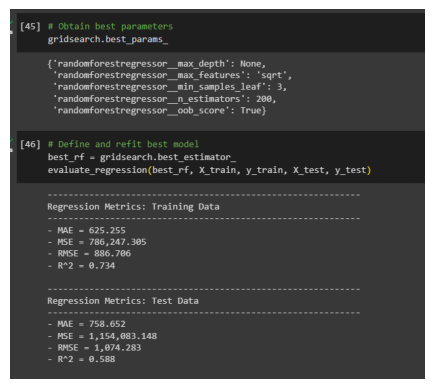

In [ ]:
plt.imshow(img)
plt.axis('off');


The **R^2 value** represents the percentage of variation that a model can explain, in other words, the R^2 value explains how well a model predicts the target values. So a score of .588 means the model can account for about 59% of the variation in your target values using your feature values. Generally, a higher R^2 is better.

**Mean Absolute Error (MAE)** measures error by using the absolute values of all the errors a model makes so positive and negative erros don't cancel each other out and make the overall error seem less than what it is. The lower MAE is, the better.

**Mean Squared Error (MSE)** squares the error values as opposed to taking the absolute values. Squaring the error values automatically makes them positive so error canceling due to negative error does not occur. MSE punishes larger errors more than smaller errors as an error twice as large results in a penalty that is 4 times higher. We would rather have more smaller errors than less very large errors and MSE is good at detecting large errors. The lower the MSE, the better.

**Root Mean Squared Error (RMSE)** is like the best of both worlds when compared to MAE and MSE. It takes the square root of the MSE (mean squared error). This means it punishes large errors and is expressed in the same units as the target making it easier to interpret. The lower the RSME, the better.

**I would explain RMSE to my stakeholders because it is expressed in the same units as the target and I could tell them that the value means the model is off by x amount. In this case, our RMSE is 1,074.283 for the test data meaning the model's predicted values will be off by roughly that amount. I could use the MAE value instead which looks nicer because it is lower but I feel would be a bit misleading.**

This model is quite underfit. It does okay on the training data but significantly worse on the test data.

### **Update: When using only the parameters suggested in lecture, I did get better results (and faster run times) achieving an R^2 value of .602 for the test data of the tuned RF model.**


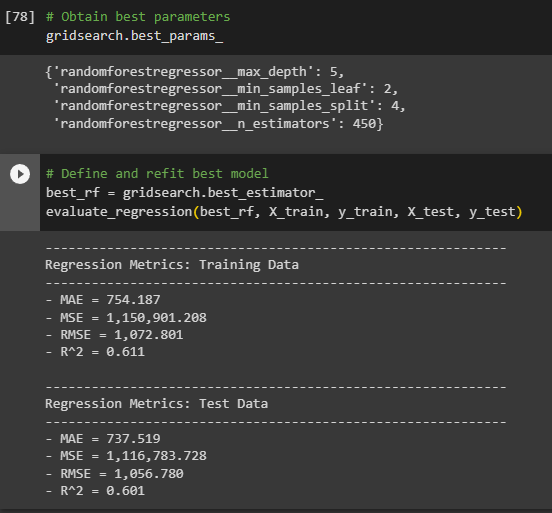

# **To-Do:**
- All imports to top and label/comment
- Make sure everything is commented
- Clean Notebook - every code cell has comment, headers bold,
- Data Folder - trabsfer from Drive
- Plot RC defaults